In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from collections import Counter

#import colorlover as cl

from IPython.display import HTML, display

from chorogrid import Colorbin, Chorogrid

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
TOPIC_MAPPING={
    "GunControl": "Gun Control",
    "Privacy": "Privacy",
    "Vaccine": "Vaccine",
    "ChildEducation": "Child Education",
    "SkinDamage": "Skin Damage",
    "SeatBelt": "Seat Belt"
}
topic_order=["Gun Control", "Privacy", "Vaccine",
             "Child Education", "Skin Damage", "Seat Belt"]
df = pd.read_hdf("FINAL_ANALYSIS_DATA.h5", "final_data").rename(columns={
        #u'is_controvertial': u'is_controversial'
    }).assign(
    topic_name=lambda x: x.topic_name.apply(lambda k: TOPIC_MAPPING[k.split('/')[0]]),
)
NON_STATES = set(["UNK", "USA", "AS", "DC", "GU",
              "MP", "PR", "VI"])

In [4]:
df.columns

Index([          u'Author',       u'City/Urban',  u'City/Urban Area',
               u'Contents',             u'Date',        u'Followers',
              u'Following',             u'GUID',           u'Gender',
                   u'Name',            u'Posts',              u'RT?',
           u'State/Region',              u'URL',             u'URL?',
              u'adjective',           u'adverb',      u'count_tweet',
               u'hashtag?',         u'mention?',         u'negation',
                   u'noun',      u'preposition',    u'processedPost',
              u'sentiment',   u'sentiment_subj', u'subjectvity_type',
                   u't_id',       u'topic_name',             u'verb',
              u't_created',       u't_retweets',      u't_favorites',
             u't_is_reply',       u't_is_quote',     u't_n_hashtags',
               u't_n_urls',     u't_n_mentions',        u't_n_media',
                   u'u_id',        u'u_created',       u'u_n_listed',
          u'u_n_favo

In [5]:
df.CATS.fillna(0).apply(
    lambda x: Counter(['UNK']) 
    if x == 0 
    else Counter(x)
).apply(lambda x: len(x)).describe()

count    246869.000000
mean          1.139163
std           0.356983
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: CATS, dtype: float64

In [6]:
df["CATS_Counter"] = df.CATS.fillna(0).apply(
    lambda x: Counter(['NONE']) 
    if x == 0 
    else Counter(x)
)
df.ix[df.CATS_Counter.apply(lambda x: len(x)) == 2, "CATS_Counter"].head()

/home/content/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


23     {u'socialmedia': 1, u'videos': 1}
29    {u'twitter': 1, u'socialmedia': 1}
38     {u'socialmedia': 1, u'videos': 1}
53     {u'socialmedia': 1, u'videos': 1}
54    {u'twitter': 1, u'socialmedia': 1}
Name: CATS_Counter, dtype: object

## Plotly plot

In [7]:
def get_string(x, cols):
    return "<br>".join("%s: %s" % (k.title(), x[k])
                       for k in cols)

In [8]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [9]:
df_t = df[df.u_state != "USA"].groupby("u_state")["is_controversial"].agg([np.mean, len, np.std]).reset_index()
df_t

,u_state,mean,len,std
0,AK,0.618557,291,0.486578
1,AL,0.587302,1449,0.492489
2,AR,0.634062,869,0.481970
3,AS,0.300000,10,0.483046
4,AZ,0.573411,3242,0.494658
5,CA,0.654161,22123,0.475652
6,CO,0.617085,2669,0.486189
7,CT,0.594237,1284,0.491230
8,DC,0.822330,5150,0.382272
9,DE,0.543796,274,0.498990


In [10]:
mycolors = ['#b35806', '#f1a340', '#fee0b6', '#d8daeb', '#998ec3', '#542788']
mybin = Colorbin(df_t['mean'], mycolors, proportional=True, decimals=None)
mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')

In [11]:
states = list(df_t.u_state)
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

for lst in ['states', 'colors_by_state', 'font_colors_by_state', 'legend_colors', 'legend_labels']:
    obj = eval(lst)
    print("{:>20}: len {:2}: {}...".format(lst, len(obj), obj[:3]))

              states: len 56: ['AK', 'AL', 'AR']...
     colors_by_state: len 56: ['#d8daeb', '#d8daeb', '#d8daeb']...
font_colors_by_state: len 56: ['#101010', '#101010', '#101010']...
       legend_colors: len  6: ['#b35806', '#f1a340', '#fee0b6']...
       legend_labels: len  6: [u'0.0-0.2', u'0.2-0.3', u'0.3-0.5']...


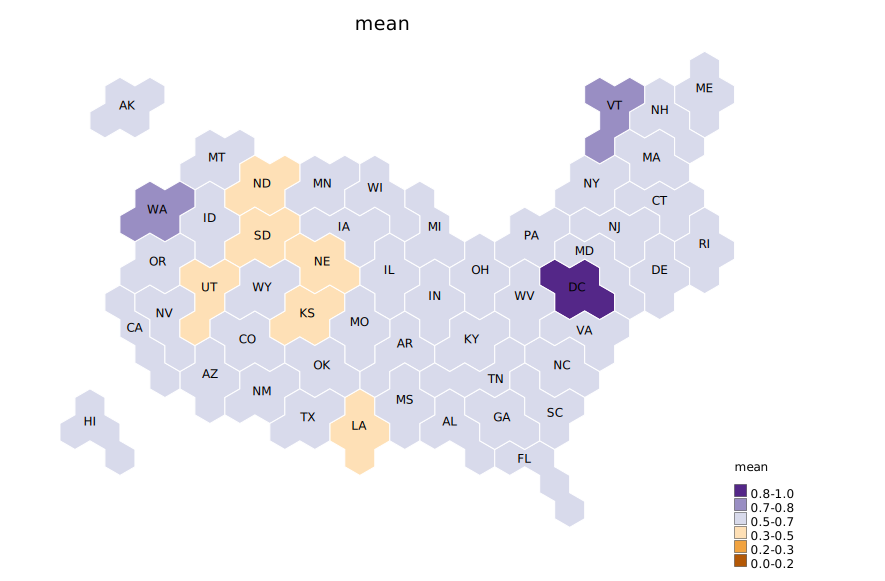

In [12]:
cg = Chorogrid('/content/Code/smishra8/chorogrid/chorogrid/databases/usa_states.csv', states, colors_by_state)
cg.set_title('mean', font_dict={'font-size': 19})
cg.set_legend(legend_colors, legend_labels, title='mean')
cg.draw_multihex(spacing_dict={'margin_right': 150}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True)

In [13]:
def plot_map(df, location_col, value_col, text_cols,
            scl="Portland", title="", cbar_title="", decimals=2):
    
    mycolors = ['#b35806', '#f1a340', '#fee0b6', '#d8daeb', '#998ec3', '#542788']
    mybin = Colorbin(df[value_col].astype(float), mycolors,
                     #proportional=True,
                     decimals=None)
    mybin.set_decimals(decimals)
    mybin.recalc(fenceposts=True)
    mybin.calc_complements(0.5, '#e0e0e0', '#101010')
    
    states = list(df[location_col])
    colors_by_state = mybin.colors_out
    font_colors_by_state = mybin.complements
    legend_colors = mybin.colors_in
    legend_labels = mybin.labels
    
    cg = Chorogrid('/content/Code/smishra8/chorogrid/chorogrid/databases/usa_states.csv', states, colors_by_state)
    cg.set_title(title, font_dict={'font-size': 19})
    cg.set_legend(legend_colors, legend_labels, title=cbar_title)
    #cg.draw_squares(spacing_dict={'margin_right': 150}) # otherwise legend will be cut off
    cg.draw_multihex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
    cg.done(show=True)

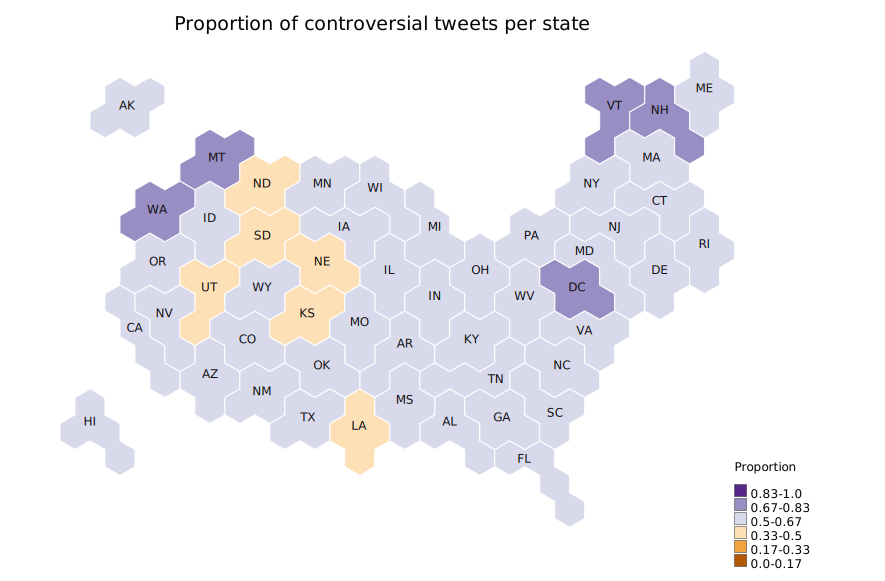

In [14]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_t = df[df.u_state != "USA"].groupby("u_state")["is_controversial"].agg([np.mean, len, np.std]).reset_index()

plot_map(df_t,
         "u_state", "mean", ["u_state","len", "std"], scl='Portland',
         title="Proportion of controversial tweets per state",
         cbar_title="Proportion"
        )

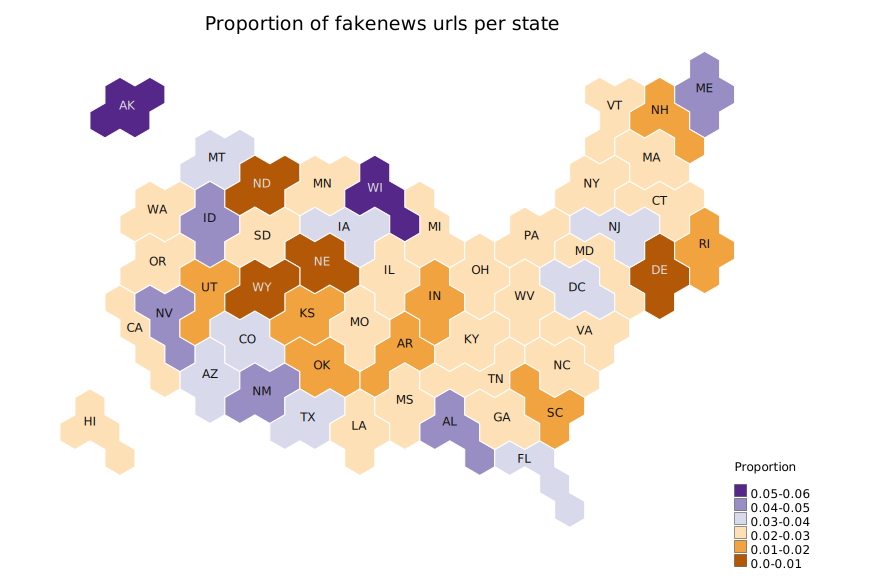

In [15]:
df_t = df.assign(
    fakenews=df.CATS_Counter.apply(lambda x: x.get('fakenews', 0))
)[["u_state", "fakenews"]].groupby("u_state")["fakenews"].agg([np.mean, len, np.std]).reset_index()

plot_map(df_t,
         "u_state", "mean", ["u_state","len", "std"], scl='Portland',
         title="Proportion of fakenews urls per state",
         cbar_title="Proportion"
        )

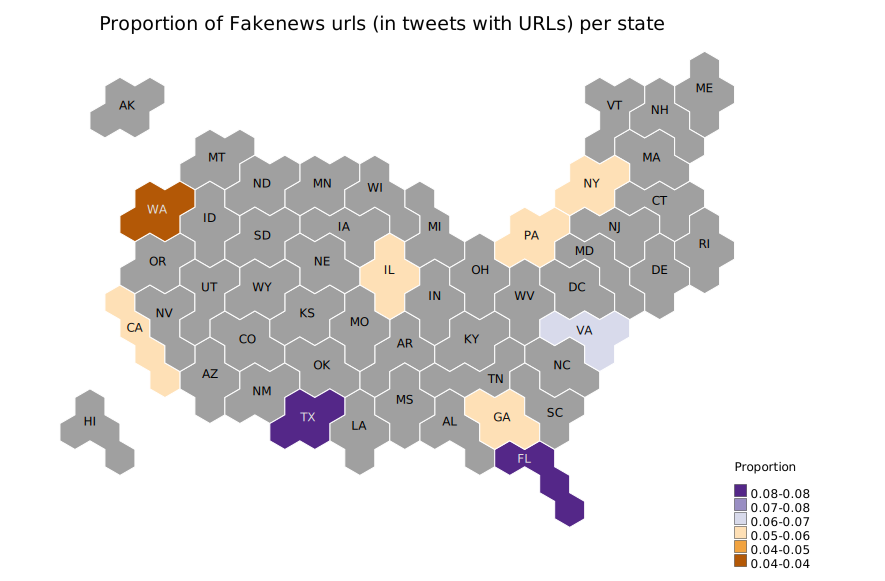

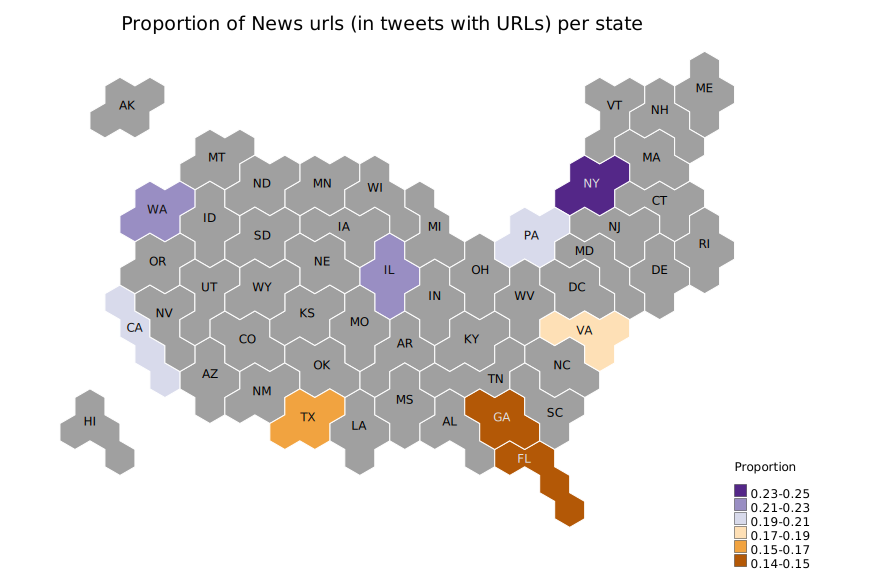

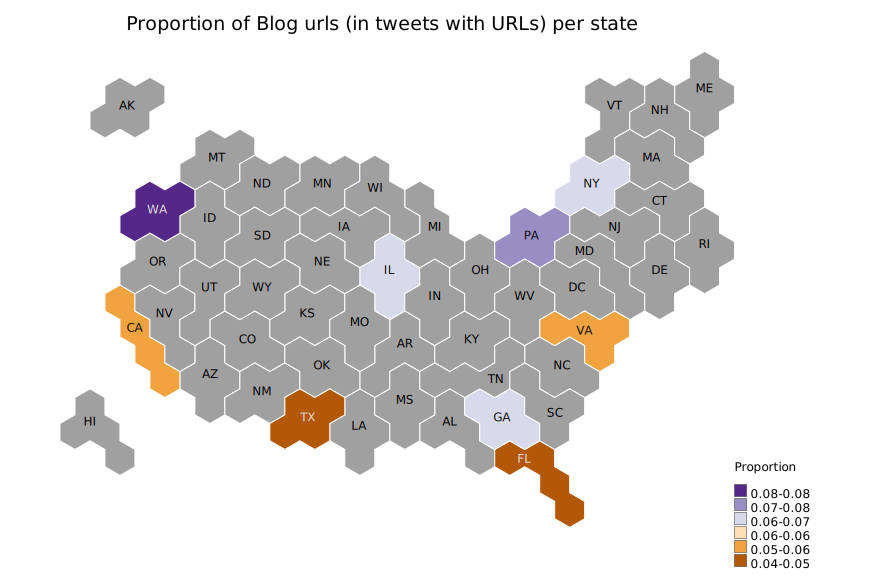

In [16]:
for url_type in ["fakenews", "news", "blog"]:
    df_t = df[(df.u_state != "USA")
        & (df.t_n_urls > 0)].assign(**{
        url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))}
    )[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()

    plot_map(df_t[
            #(df_t["len"] > (df_t["len"].sum() * 0.01))
            (df_t["len"] >= (df_t["len"].sort_values().values[-10])) 
            & (~df_t["u_state"].isin(NON_STATES))
        ],
             "u_state", "mean", ["u_state","len", "std"], scl='Portland',
             title="Proportion of %s urls (in tweets with URLs) per state" % url_type.title(),
             cbar_title="Proportion"
            )

## Split by topics

In [17]:
df.topic_name.value_counts()

Privacy            73593
Seat Belt          73270
Vaccine            40713
Gun Control        34357
Skin Damage        14128
Child Education    10808
Name: topic_name, dtype: int64

### Fake News Maps

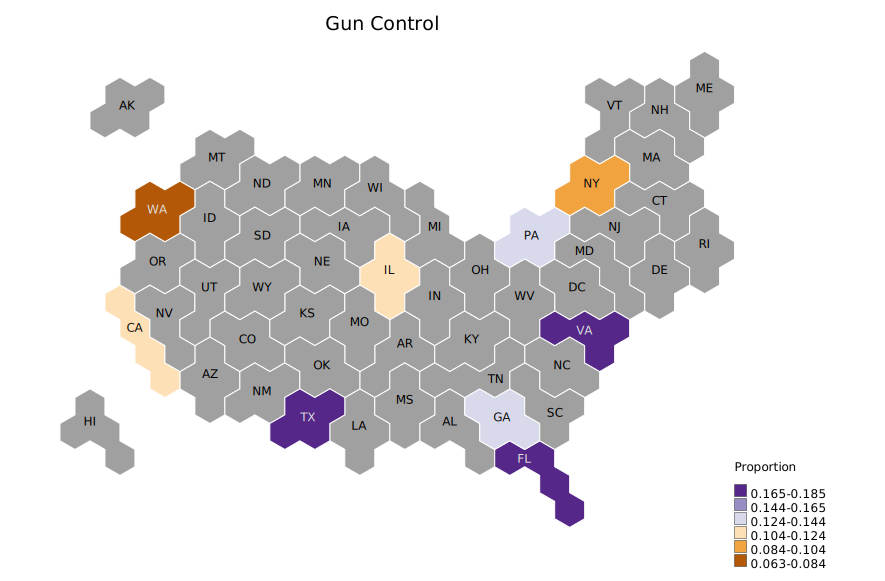

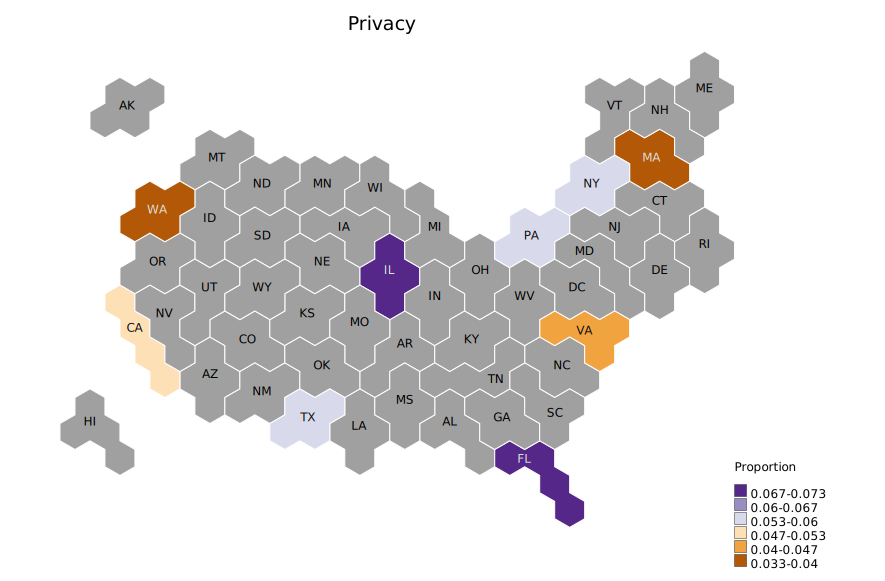

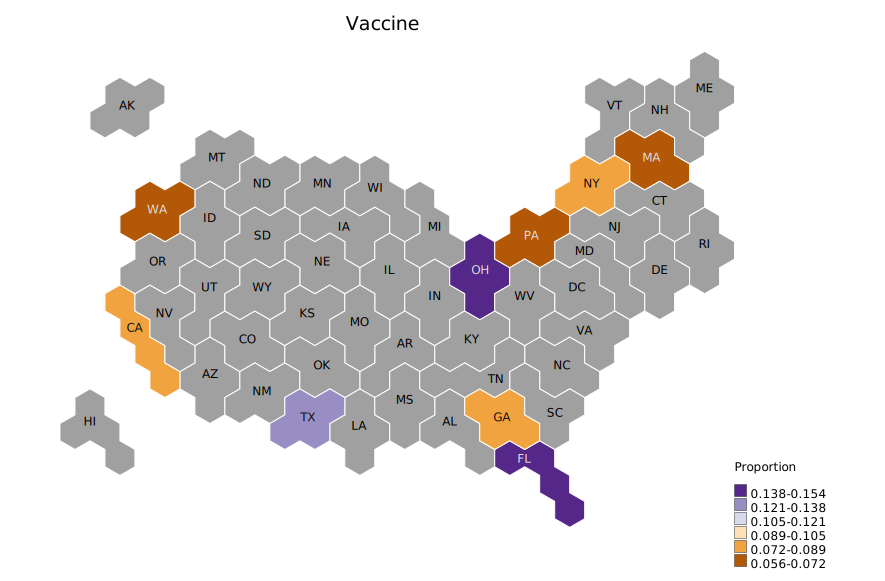

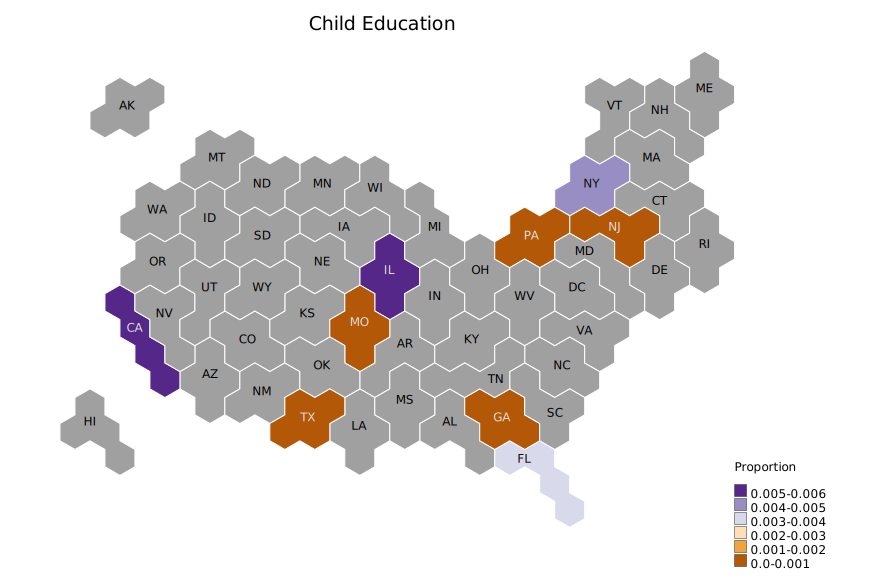

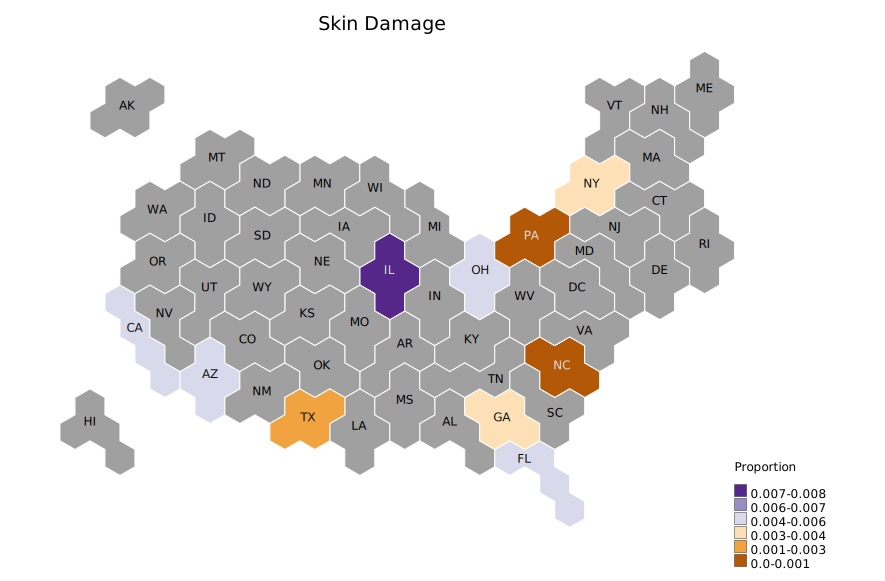

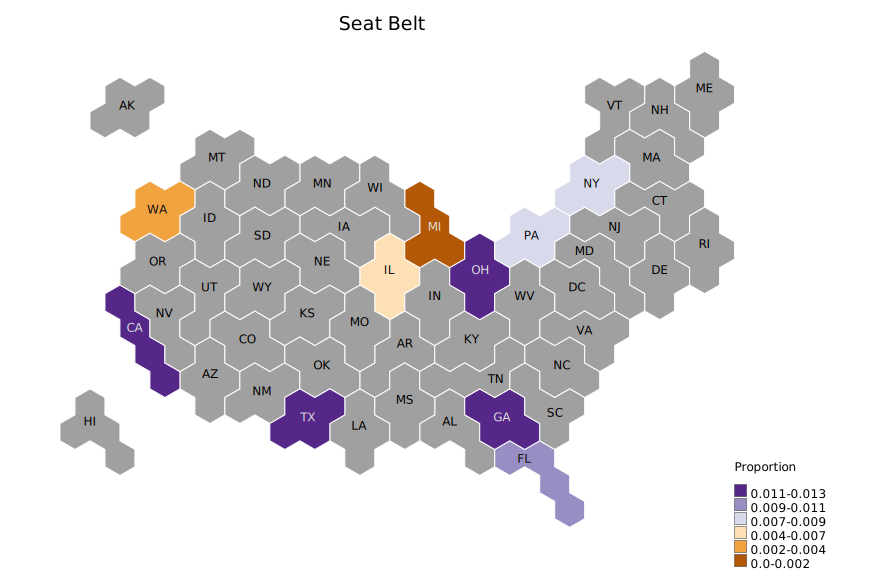

In [18]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
url_type = "fakenews"
for topic in topic_order:
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(
    fakenews=lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))
    )[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()
    df_t["value_rank"] = df_t["mean"].rank(ascending=False)
    plot_map(df_t[
            #(df_t["len"] > (df_t["len"].sum() * 0.01))
            (df_t["len"] >= (df_t["len"].sort_values().values[-10]))
            & (~df_t["u_state"].isin(NON_STATES))
            
        ],
         "u_state", "mean", ["u_state", "value_rank", "mean","len", "std"], scl="Portland",
         title=topic,
         cbar_title="Proportion",
            decimals=3
        )

### Blog Maps

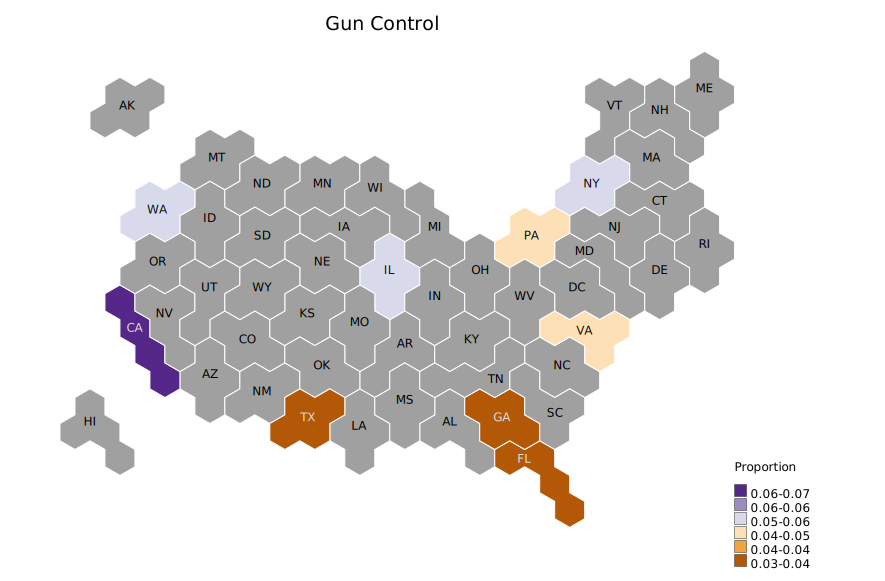

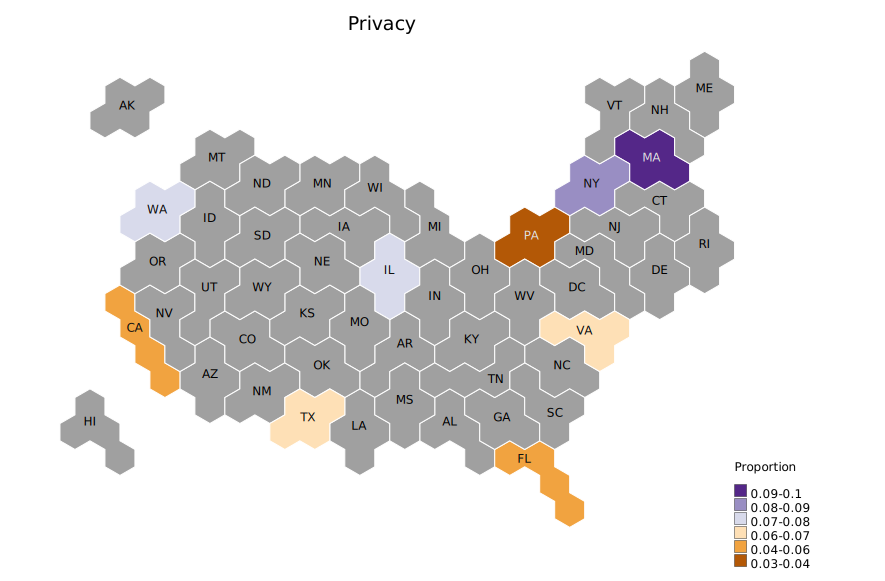

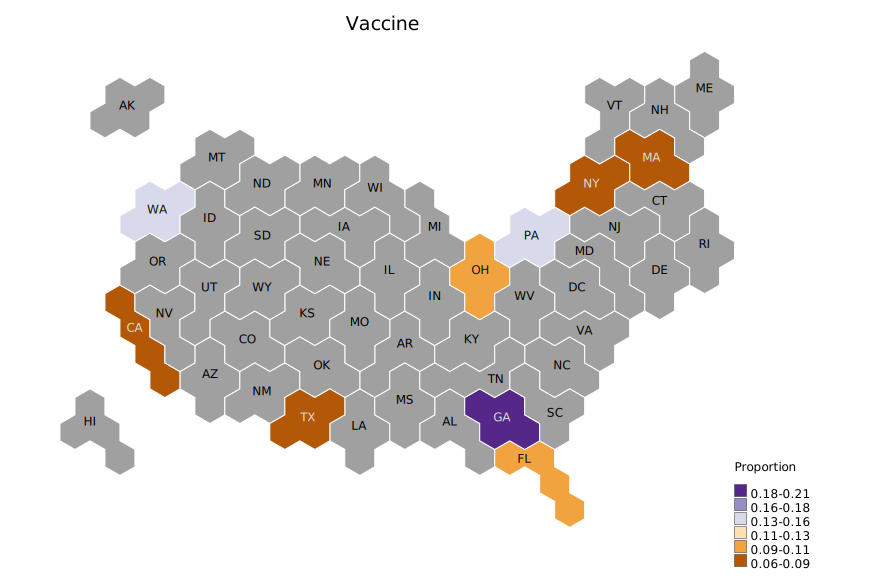

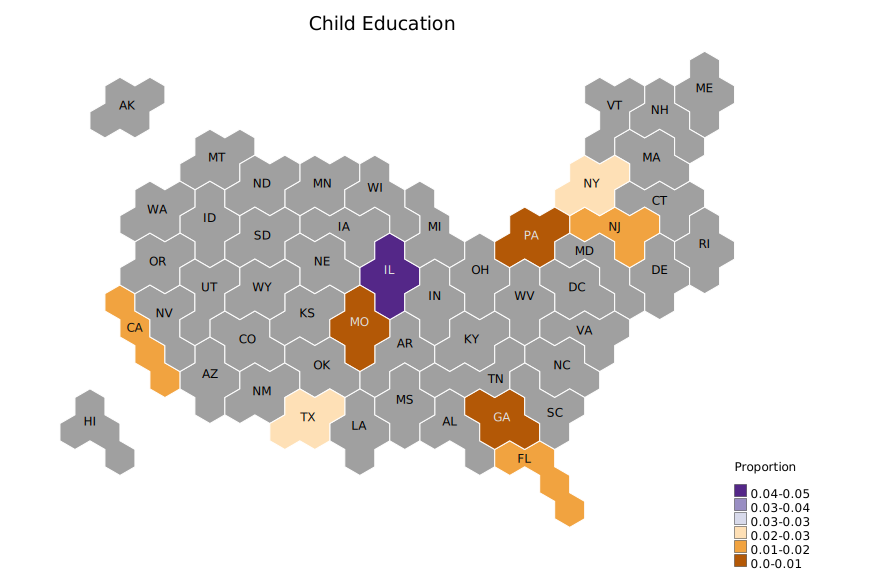

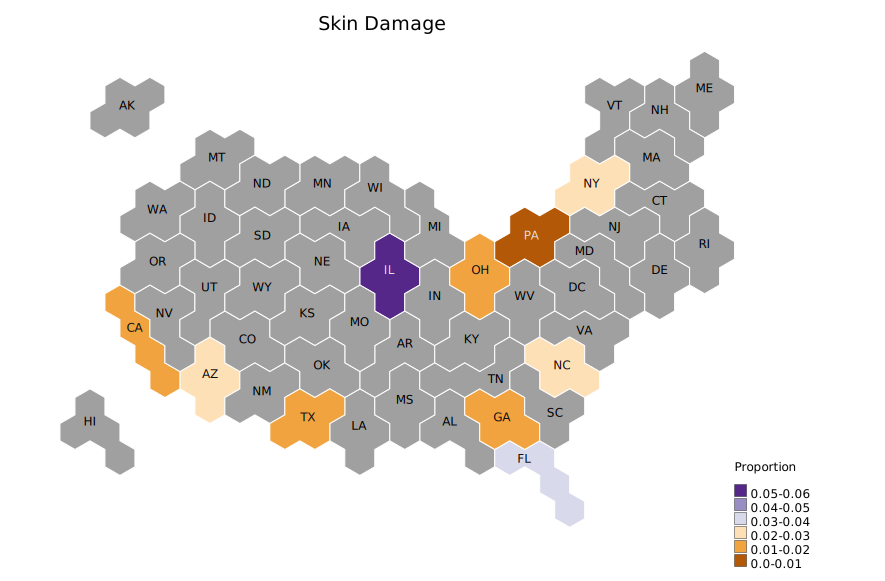

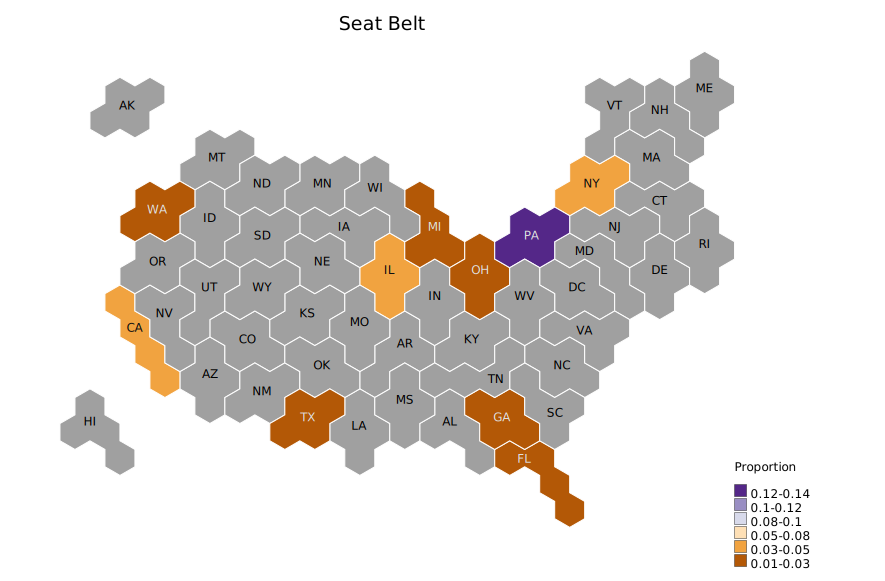

In [19]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
url_type = "blog"
for topic in topic_order:
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(**{
    url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))
    })[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()
    df_t["value_rank"] = df_t["mean"].rank(ascending=False)
    plot_map(df_t[
            #(df_t["len"] > (df_t["len"].sum() * 0.01))
            (df_t["len"] >= (df_t["len"].sort_values().values[-10]))
            & (~df_t["u_state"].isin(NON_STATES))
            
        ],
         "u_state", "mean", ["u_state", "value_rank", "mean","len", "std"], scl="Portland",
         title=topic,
         cbar_title="Proportion"
        )

### News Maps

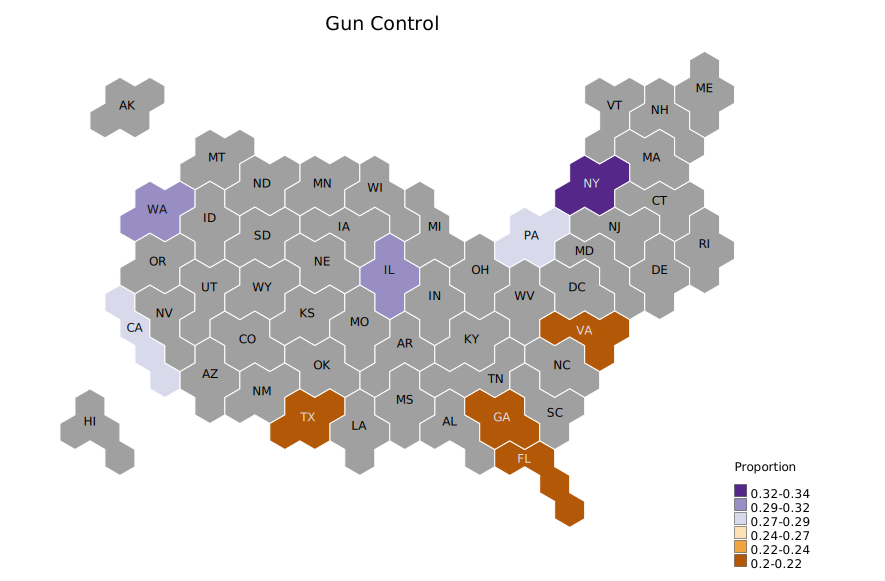

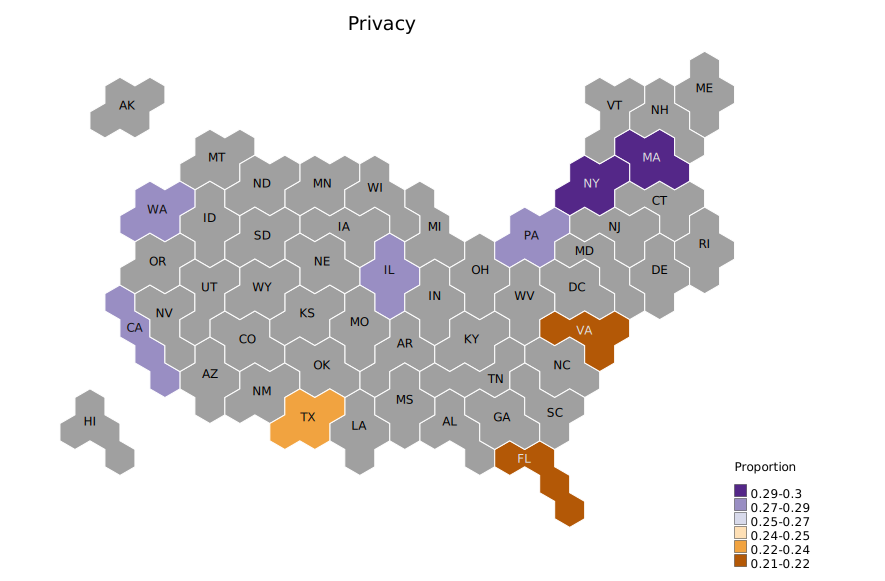

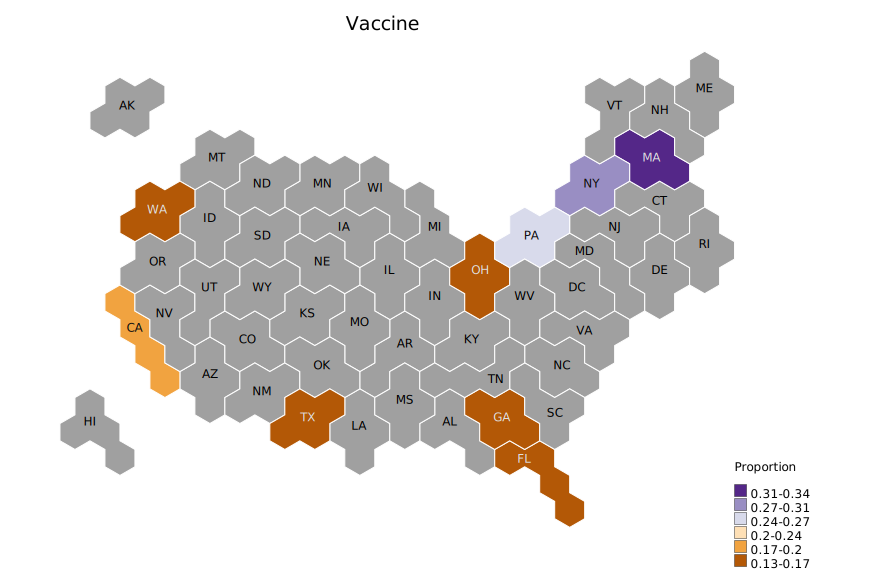

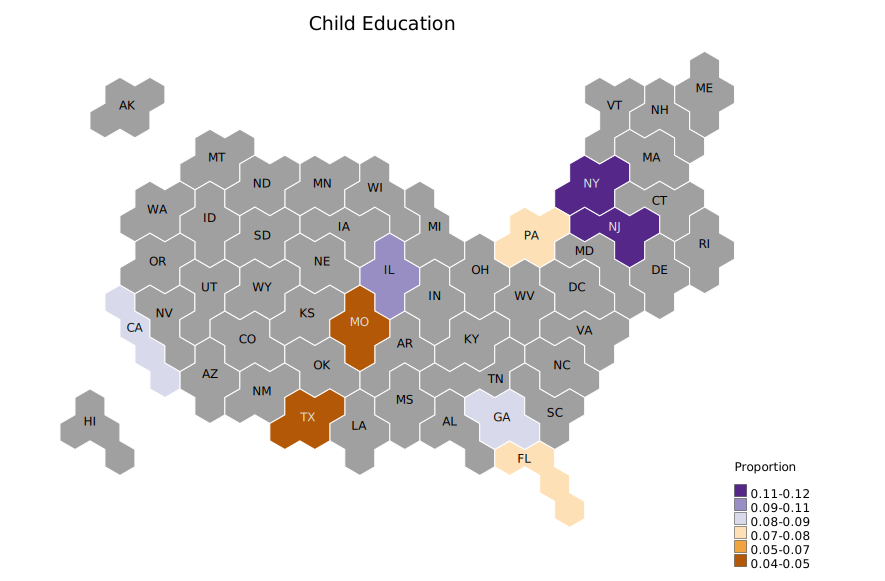

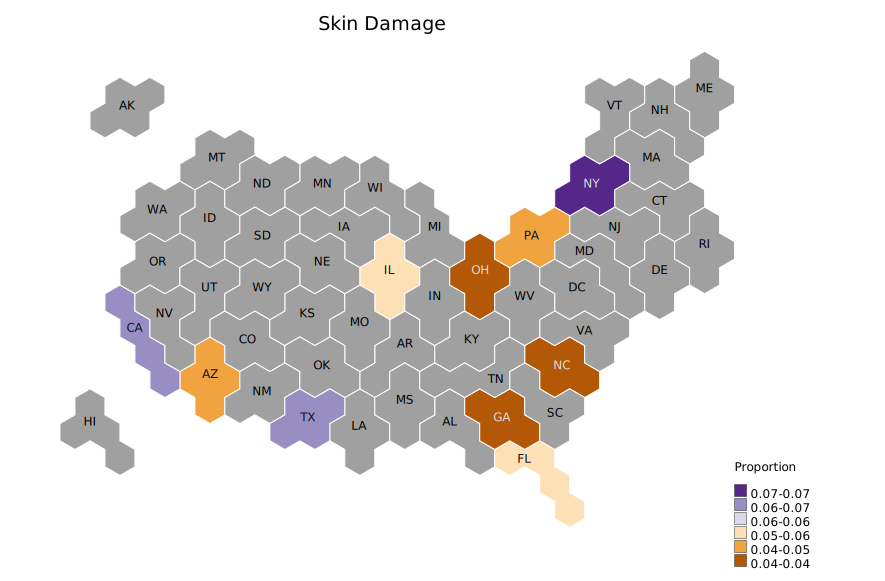

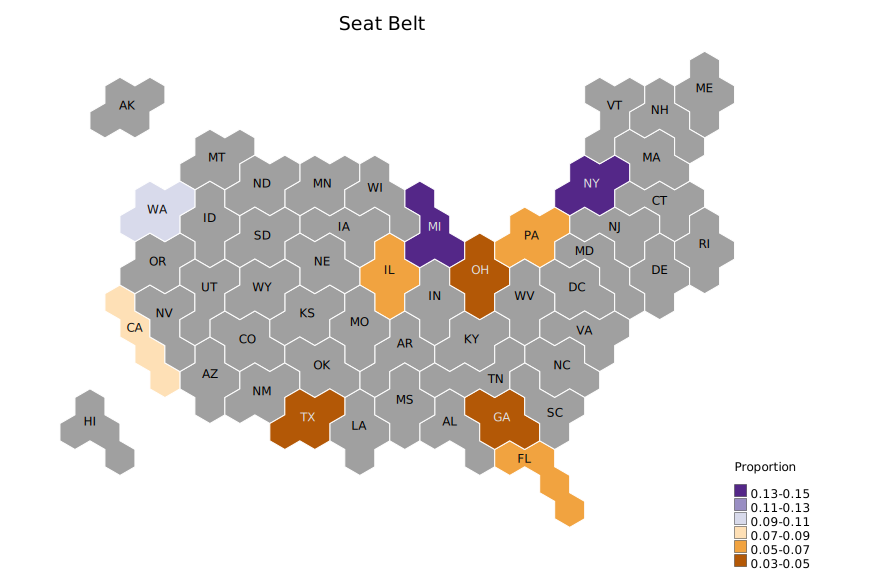

In [20]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
url_type = "news"
for topic in topic_order:
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(**{
    url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))
    })[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()
    df_t["value_rank"] = df_t["mean"].rank(ascending=False)
    plot_map(df_t[
            #(df_t["len"] > (df_t["len"].sum() * 0.01))
            (df_t["len"] >= (df_t["len"].sort_values().values[-10]))
            & (~df_t["u_state"].isin(NON_STATES))
            
        ],
         "u_state", "mean", ["u_state", "value_rank", "mean","len", "std"], scl="Portland",
         title=topic,
         cbar_title="Proportion"
        )

In [21]:
def plot_map_subplots(df, geo_key, topic, location_col, value_col, text_cols,
            scl="Portland", cbar_title="", decimals=2):
    
    
    mycolors = ['#b35806', '#f1a340', '#fee0b6', '#d8daeb', '#998ec3', '#542788']
    mybin = Colorbin(df[value_col].astype(float), mycolors,
                     #proportional=True,
                     decimals=None)
    mybin.set_decimals(decimals)
    mybin.recalc(fenceposts=True)
    mybin.calc_complements(0.5, '#e0e0e0', '#101010')
    
    states = list(df[location_col])
    colors_by_state = mybin.colors_out
    font_colors_by_state = mybin.complements
    legend_colors = mybin.colors_in
    legend_labels = mybin.labels
    
    cg = Chorogrid('/content/Code/smishra8/chorogrid/chorogrid/databases/usa_states.csv', states, colors_by_state)
    cg.set_title(topic, font_dict={'font-size': 19})
    cg.set_legend(legend_colors, legend_labels, title='mean')
    #cg.draw_squares(spacing_dict={'margin_right': 150}) # otherwise legend will be cut off
    cg.draw_multihex(spacing_dict={'margin_right': 150}, font_colors=font_colors_by_state)
    cg.done(show=True)
    
    return data, layout

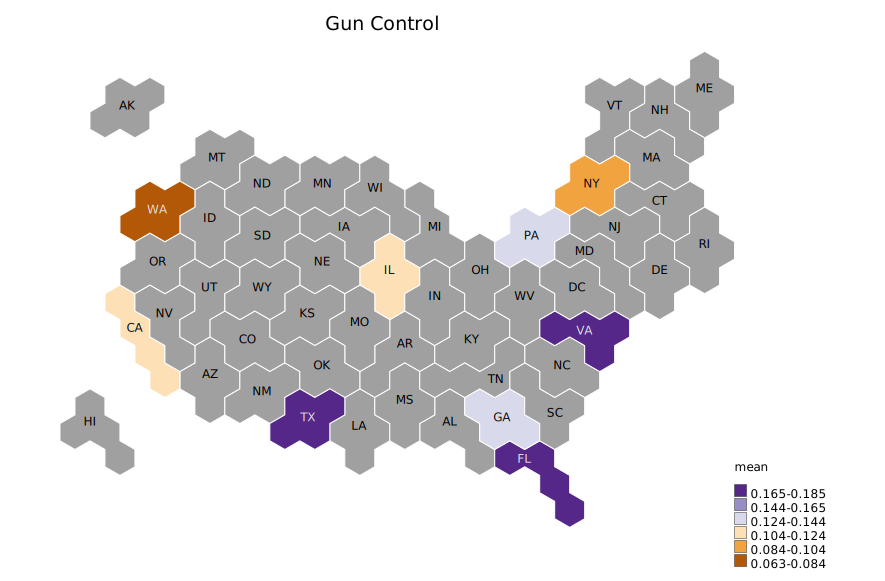

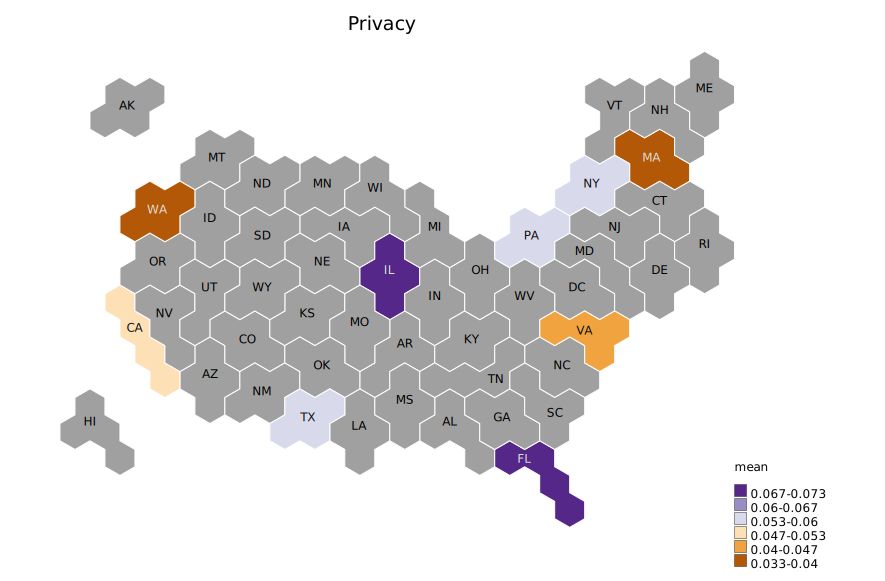

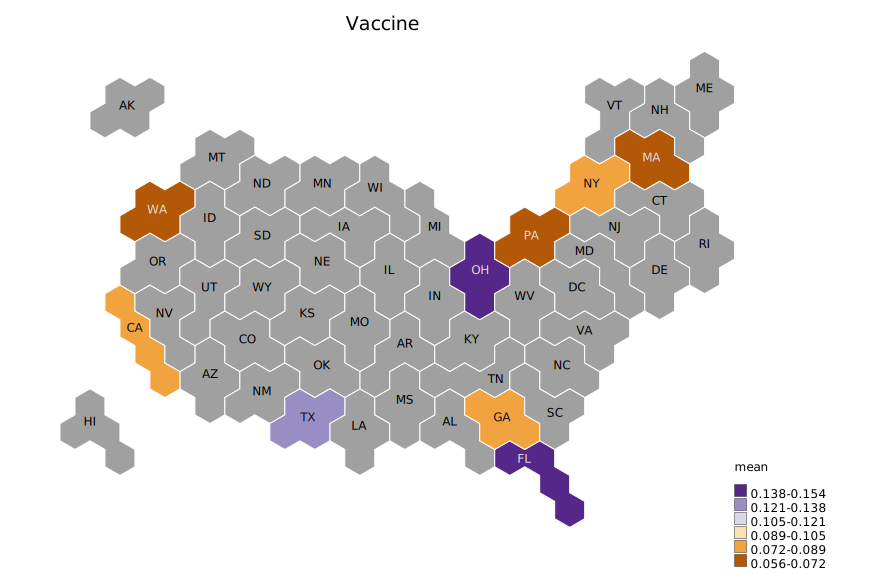

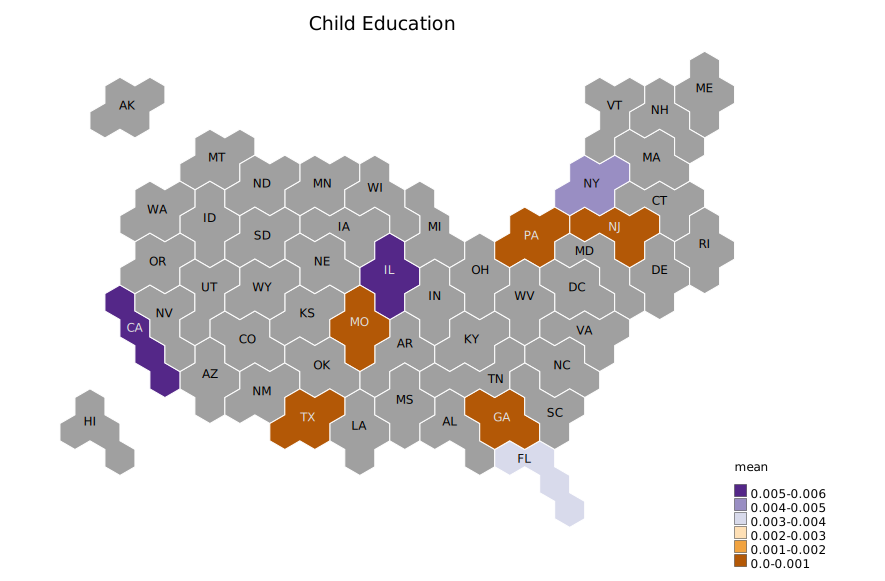

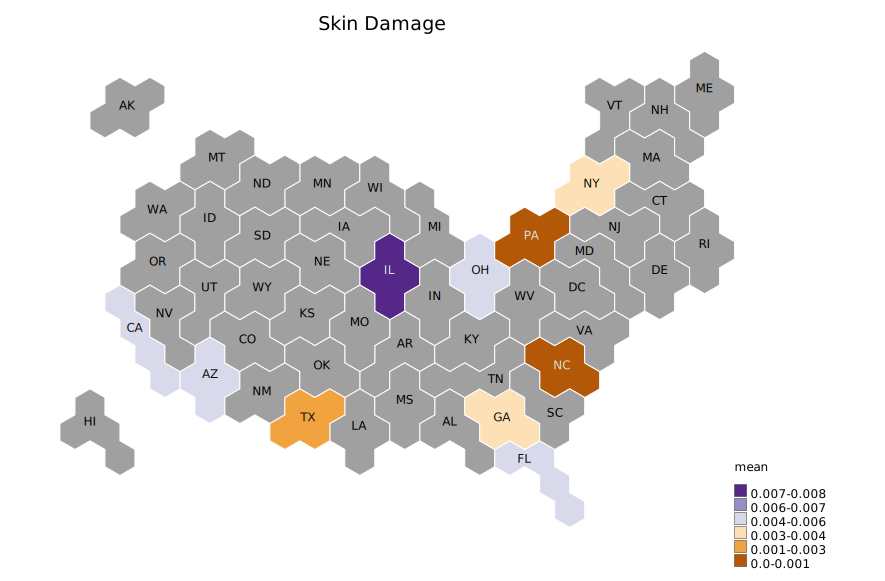

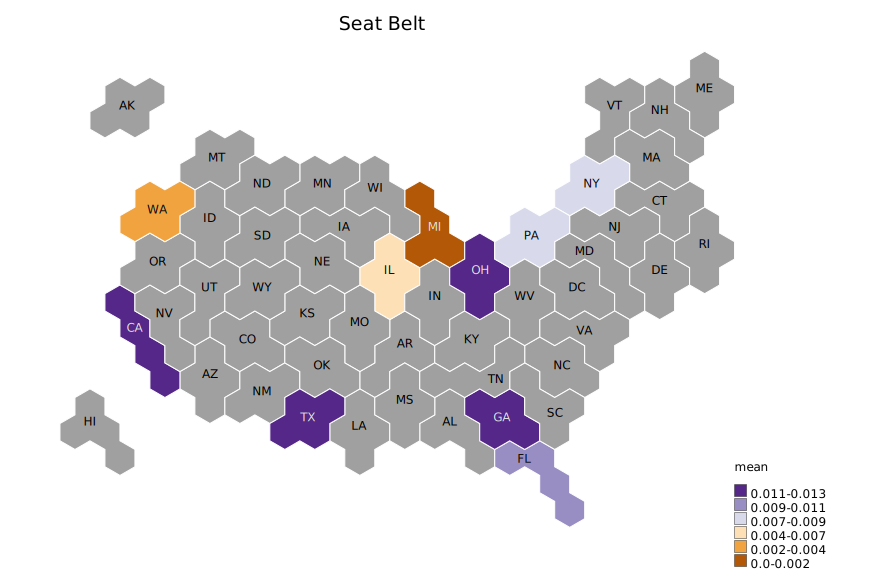

In [22]:
data = []
COLS = 3
ROWS = 2

url_type="fakenews"
layout = dict(
    title = '%s URL proportions per state' % url_type.title(),
    # showlegend = False,
    autosize = False,
    width = 900,
    height = 400,
    hovermode = False,)

for i, topic in enumerate(topic_order):
    geo_key="geo%s" % (i+1) if i != 0 else "geo" # Important to index geo with i+1 rather than i
    x = i % COLS
    y = i / COLS
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(**{
    url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))}
    )[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()
    data_t, layout_t = plot_map_subplots(
        df_t[(df_t["len"] >= (df_t["len"].sort_values().values[-10]))
             & (~df_t["u_state"].isin(NON_STATES))
            ], geo_key, topic,
         "u_state", "mean", ["u_state","len", "std"], scl='Portland',
         cbar_title="Proportion", decimals=3
        )
    
#fig = dict(data=data, layout=layout)
#py.offline.iplot(fig, filename='d3-cloropleth-map') 

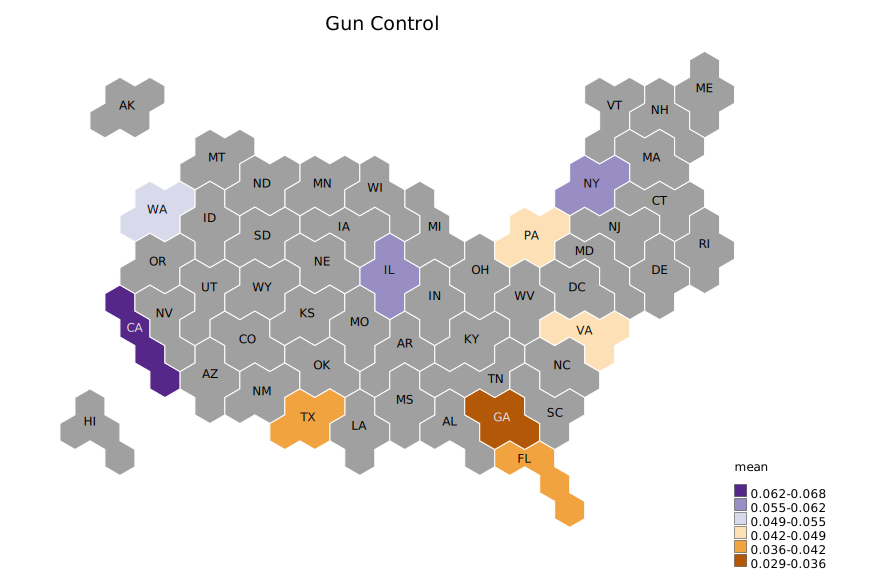

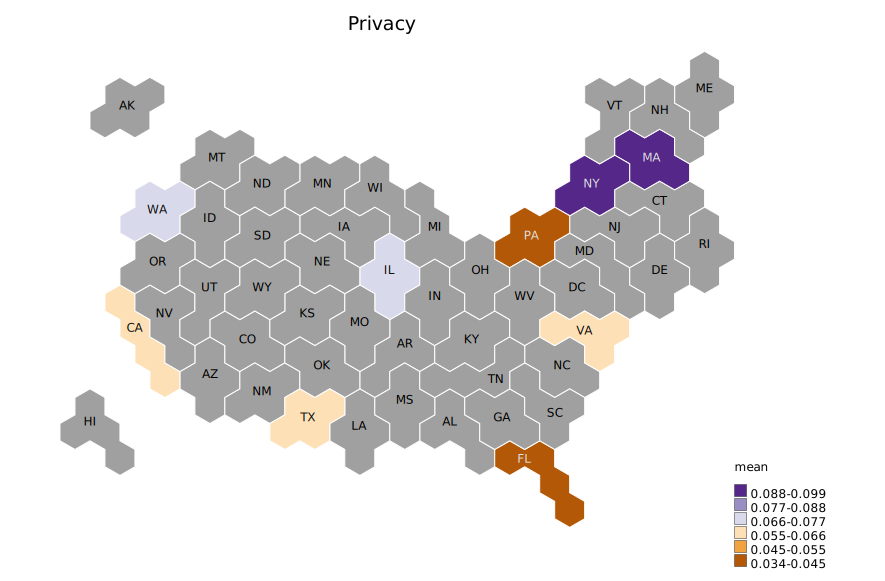

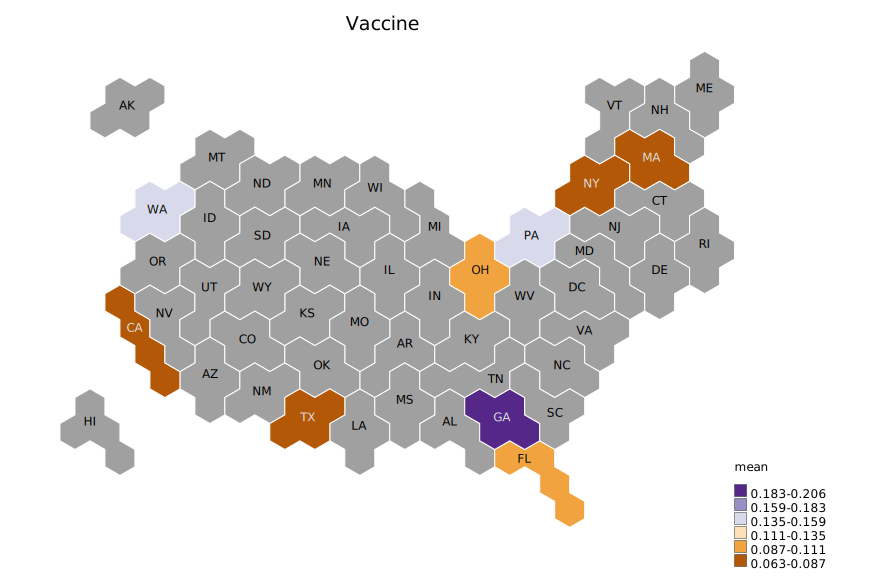

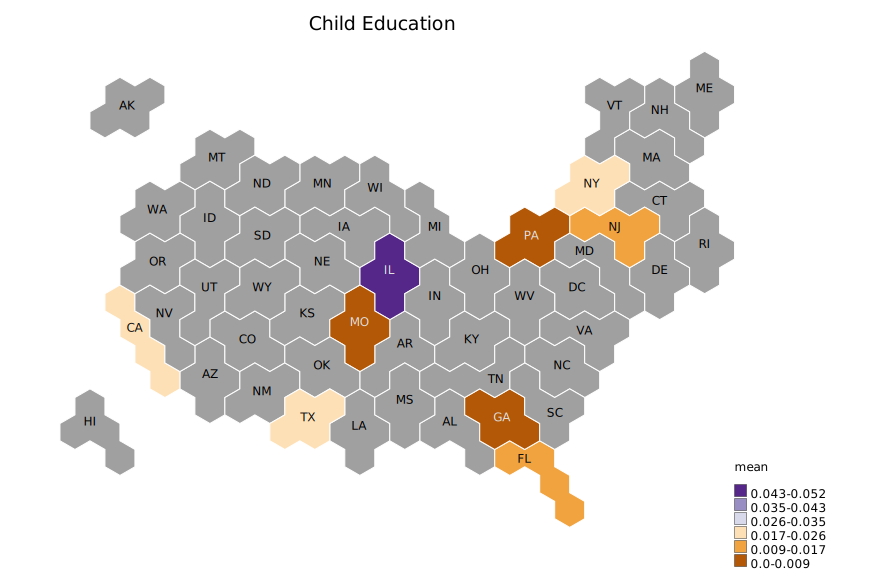

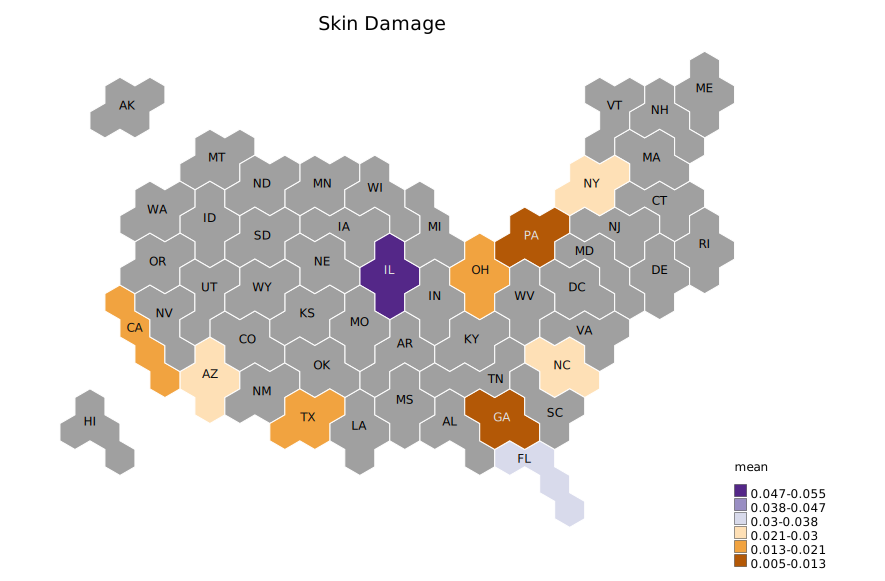

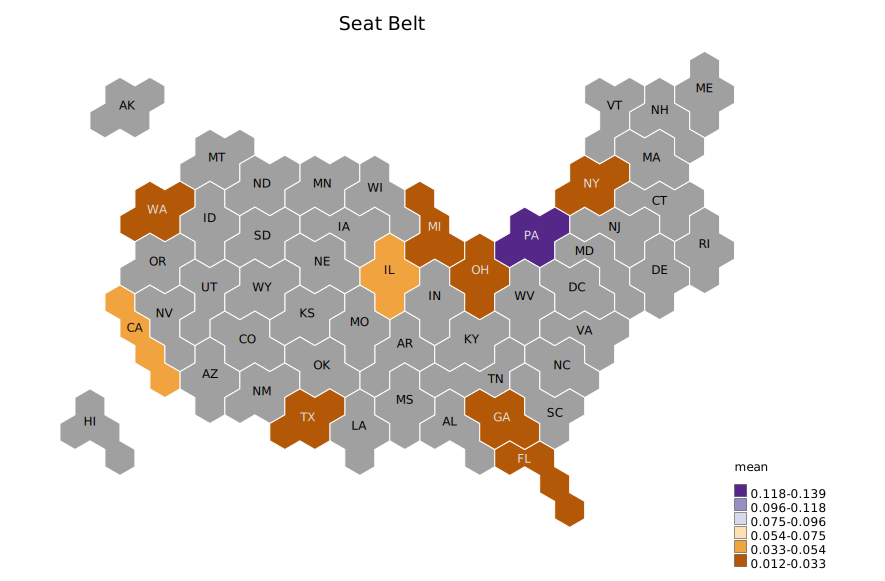

In [23]:
data = []
COLS = 3
ROWS = 2

url_type="blog"
layout = dict(
    title = '%s URL proportions per state' % url_type.title(),
    # showlegend = False,
    autosize = False,
    width = 900,
    height = 400,
    hovermode = False,)

for i, topic in enumerate(topic_order):
    geo_key="geo%s" % (i+1) if i != 0 else "geo" # Important to index geo with i+1 rather than i
    x = i % COLS
    y = i / COLS
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(**{
    url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))}
    )[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()
    data_t, layout_t = plot_map_subplots(
        df_t[(df_t["len"] >= (df_t["len"].sort_values().values[-10]))
             & (~df_t["u_state"].isin(NON_STATES))
            ], geo_key, topic,
         "u_state", "mean", ["u_state","len", "std"], scl='Portland',
         cbar_title="Proportion", decimals=3
        )

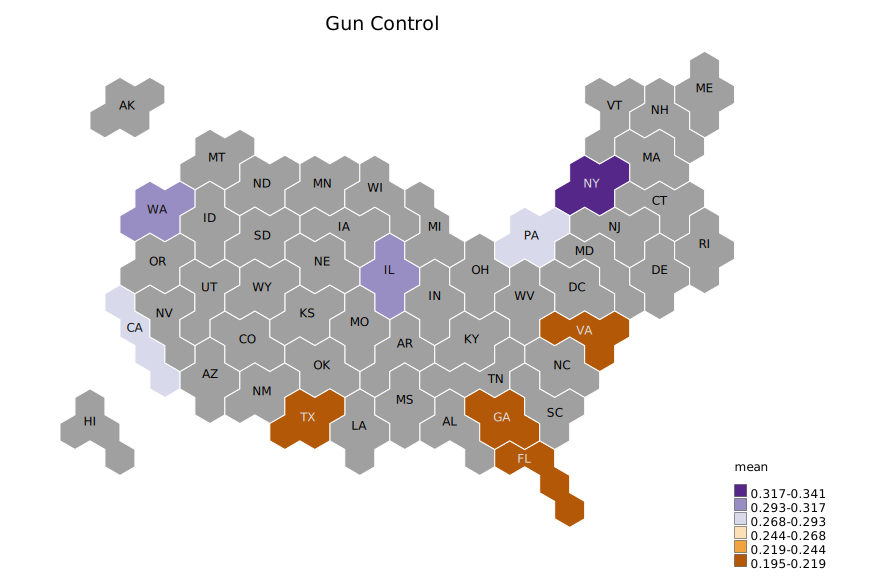

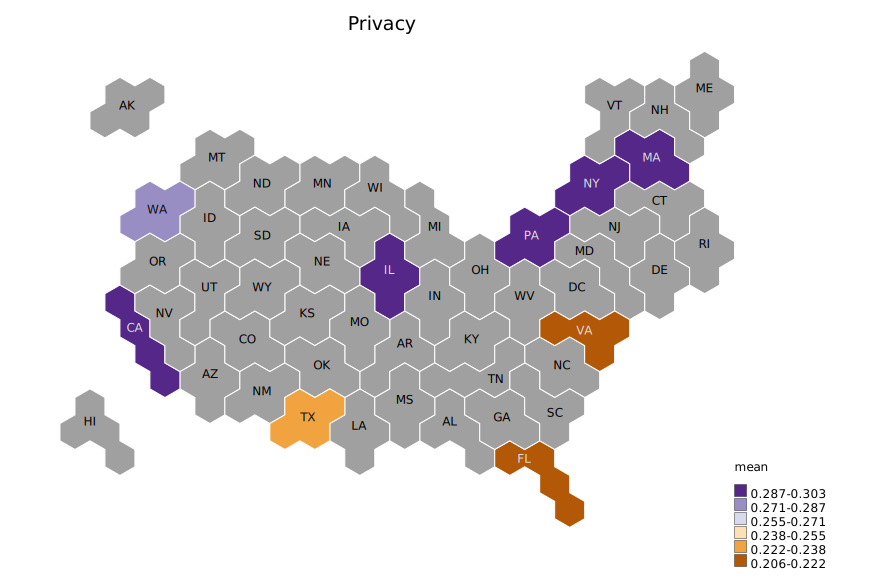

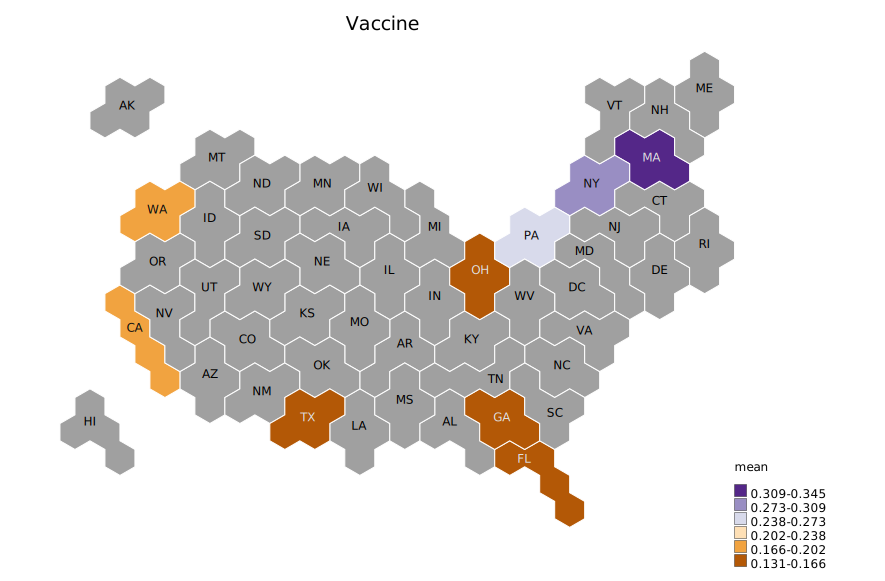

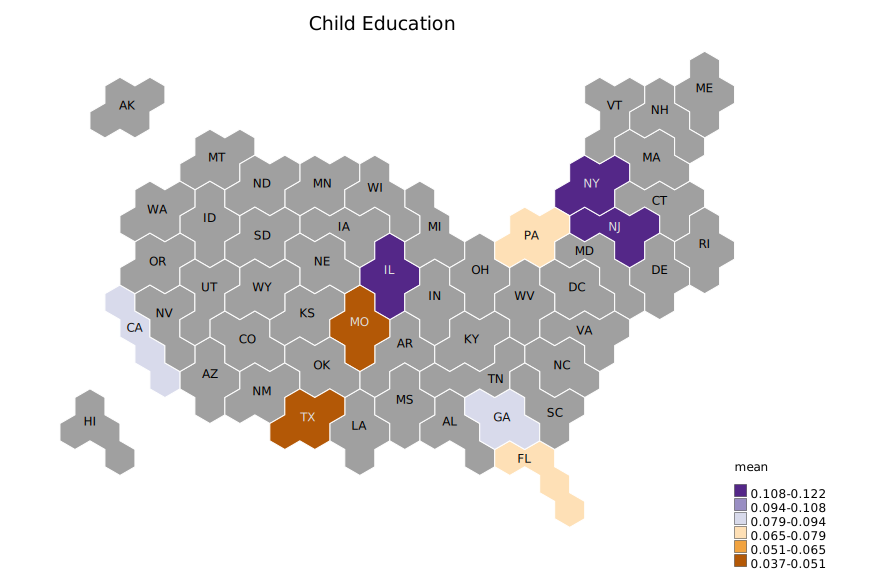

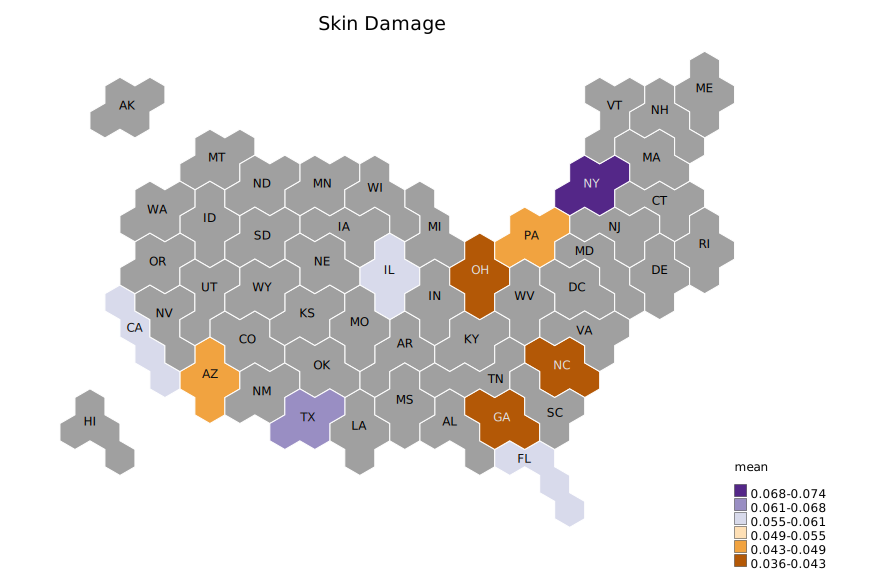

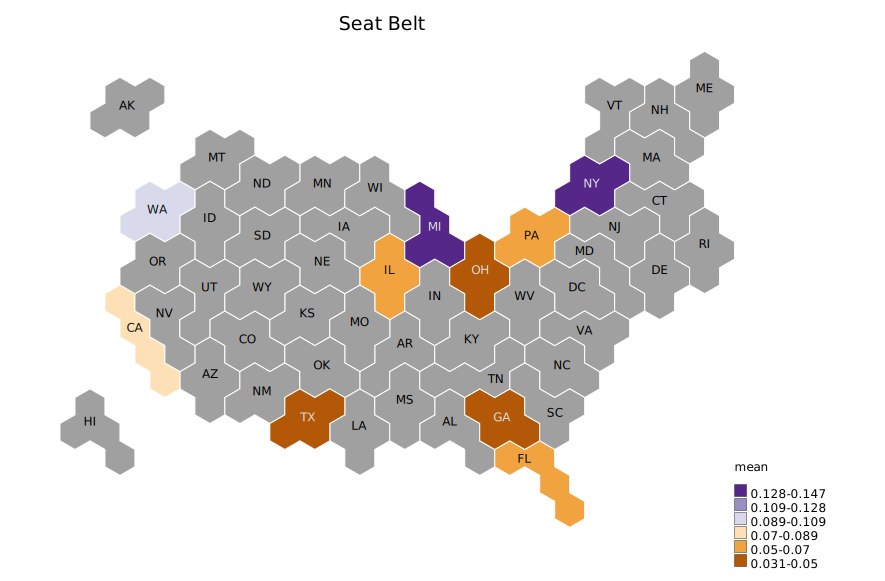

In [24]:
data = []
COLS = 3
ROWS = 2

url_type="news"
layout = dict(
    title = '%s URL proportions per state' % url_type.title(),
    # showlegend = False,
    autosize = False,
    width = 900,
    height = 400,
    hovermode = False,)

for i, topic in enumerate(topic_order):
    geo_key="geo%s" % (i+1) if i != 0 else "geo" # Important to index geo with i+1 rather than i
    x = i % COLS
    y = i / COLS
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(**{
    url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))}
    )[["u_state", url_type]].groupby("u_state")[url_type].agg([np.mean, len, np.std]).reset_index()
    data_t, layout_t = plot_map_subplots(
        df_t[(df_t["len"] >= (df_t["len"].sort_values().values[-10]))
             & (~df_t["u_state"].isin(NON_STATES))
            ], geo_key, topic,
         "u_state", "mean", ["u_state","len", "std"], scl='Portland',
         cbar_title="Proportion", decimals=3
        )

In [25]:
df_topics = {}
for topic in topic_order:
    df_t = df[(df.u_state != "USA") 
              & (df.t_n_urls > 0)
              & (df.topic_name == topic)
             ].assign(
    fakenews=lambda x: x.CATS_Counter.apply(lambda k: k.get('fakenews', 0))
    )[["u_state", "fakenews"]].groupby("u_state")["fakenews"].agg([np.mean, len, np.std]).reset_index()
    df_t["value_rank"] = df_t["mean"].rank(ascending=False)
    df_topics[topic] = (df_t[
            (df_t["len"] >= (df_t["len"].sort_values().values[-10]))
            #(df_t["len"] > (df_t["len"].sum() * 0.01)
        ].sort_values("mean",
                                          ascending=False).reset_index().apply(
            lambda x: "%s (%.2f) [%s]" % (
                x["u_state"], x["mean"], x["len"]), axis=1))
pd.concat(df_topics, axis=1, keys=topic_order)

,Gun Control,Privacy,Vaccine,Child Education,Skin Damage,Seat Belt
0,VA (0.18) [330],FL (0.07) [1252],FL (0.15) [745],DC (0.01) [154],IL (0.01) [236],TX (0.01) [759]
1,FL (0.18) [707],IL (0.07) [742],OH (0.14) [413],CA (0.01) [627],OH (0.01) [183],OH (0.01) [257]
2,TX (0.18) [938],DC (0.06) [1846],TX (0.13) [978],IL (0.01) [173],CA (0.00) [871],CA (0.01) [1404]
3,GA (0.13) [339],PA (0.06) [594],GA (0.08) [436],NY (0.00) [402],AZ (0.00) [236],GA (0.01) [356]
4,PA (0.12) [312],TX (0.06) [1526],CA (0.08) [3507],FL (0.00) [258],FL (0.00) [489],FL (0.01) [661]
5,IL (0.12) [421],NY (0.05) [2563],NY (0.08) [1660],GA (0.00) [138],GA (0.00) [275],PA (0.01) [346]
6,DC (0.12) [429],CA (0.05) [3165],PA (0.07) [432],MO (0.00) [127],NY (0.00) [636],NY (0.01) [965]
7,CA (0.11) [1530],VA (0.04) [715],DC (0.06) [385],NJ (0.00) [123],TX (0.00) [451],IL (0.01) [329]
8,NY (0.09) [1154],MA (0.04) [607],MA (0.06) [447],PA (0.00) [142],NC (0.00) [211],WA (0.00) [305]
9,WA (0.06) [394],WA (0.03) [1050],WA (0.06) [736],TX (0.00) [271],PA (0.00) [216],MI (0.00) [258]


/homed/content/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


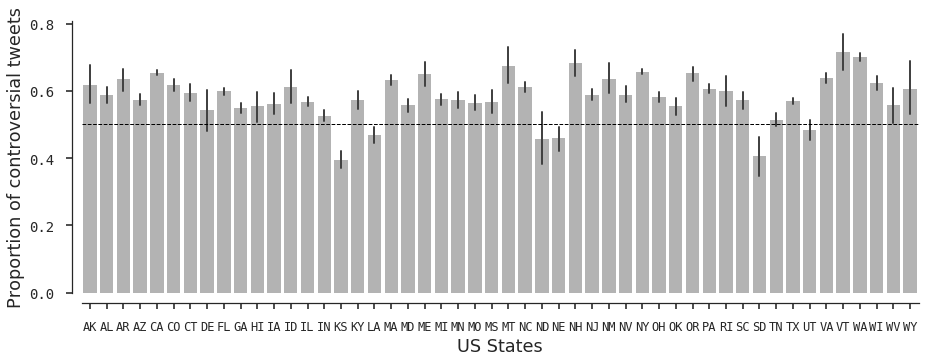

In [26]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
with sns.plotting_context(
    rc={"axes.titlesize": 14,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 14,
       }), sns.axes_style(
    rc={"font.family": "monospace"}):
    g = sns.barplot(y="is_controversial", x="u_state",
                    errwidth=2,
                data=df[~df.u_state.isin(NON_STATES)].sort_values("u_state"),
               ax=ax, color="0.7")
    ax.axhline(y=0.5, linestyle='--', color="k", lw=1.)
    ax.set_ylabel("Proportion of controversial tweets")
    ax.set_xlabel("US States")
    #ax.tick_params(axis='x', which='major', labelsize=10)
    sns.despine(offset=10)

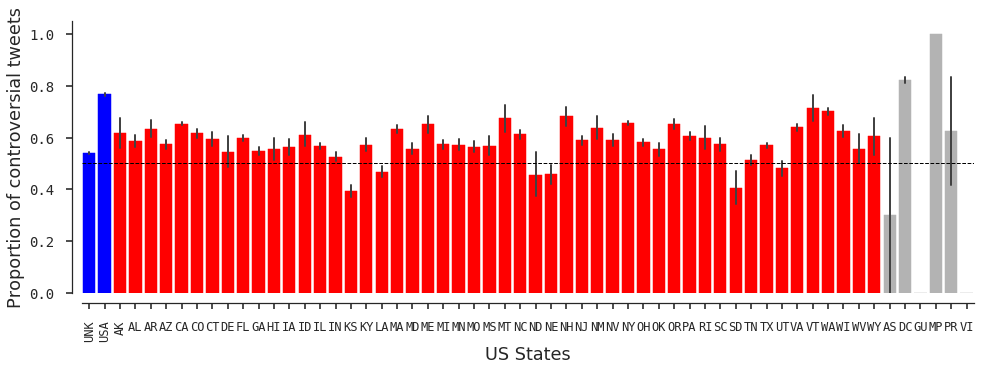

In [27]:
LOCATION_ORDER = (["UNK", "USA"] + sorted(set(
            df.u_state.fillna("UNK").value_counts().index
    ) - NON_STATES)+ sorted(["AS", "DC", "GU",
              "MP", "PR", "VI"]))
colors = ["b"] * 2 + ["r"]*50 +["0.7"]*6
fig, ax = plt.subplots(1,1,figsize=(16,5))
with sns.plotting_context(
    rc={"axes.titlesize": 14,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 14,
       }), sns.axes_style(
    rc={"font.family": "monospace"}):
    g = sns.barplot(y="is_controversial", x="u_state",
                    errwidth=2,
                data=df.assign(u_state=df.u_state.fillna("UNK")),
               ax=ax, color="r", order=LOCATION_ORDER)
    ax.axhline(y=0.5, linestyle='--', color="k", lw=1.)
    ax.set_ylabel("Proportion of controversial tweets")
    ax.set_xlabel("US States")
    #ax.tick_params(axis='x', which='major', labelsize=10)
    [ax.patches[i].set_color(c) for i, c in enumerate(colors)]
    sns.despine(offset=10)
    plt.setp(ax.get_xticklabels()[:3], rotation=90)

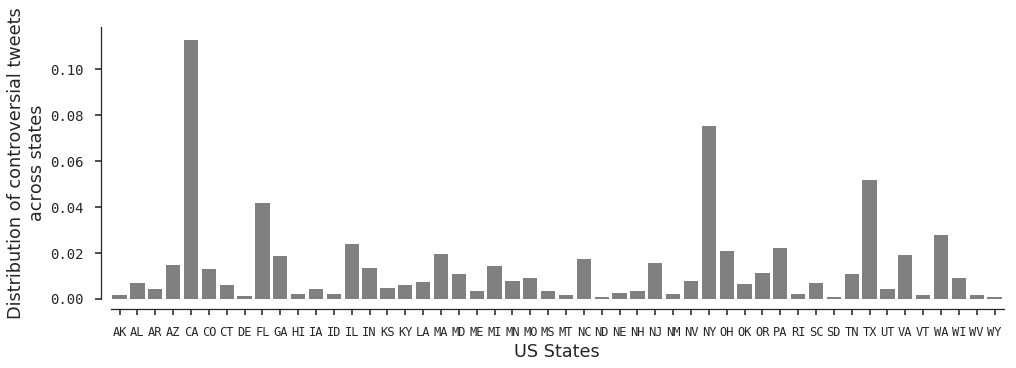

In [28]:
LOCATION_ORDER = (["UNK", "USA"] + sorted(set(
            df.u_state.fillna("UNK").value_counts().index
    ) - NON_STATES)+ sorted(["AS", "DC", "GU",
              "MP", "PR", "VI"]))
colors = ["b"] * 2 + ["r"]*50 +["k"]*6
total_controversial = df[(df.is_controversial == 1) & (~df.u_state.isin(NON_STATES))].shape[0] * 1.
fig, ax = plt.subplots(1,1,figsize=(16,5))
with sns.plotting_context(
    rc={"axes.titlesize": 14,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 14,
       }), sns.axes_style(
    rc={"font.family": "monospace"}):
    g = sns.barplot(y="is_controversial", x="u_state",
                    
                data=df[
            (df.is_controversial == 1)
            & (~df.u_state.isin(NON_STATES))
        ],
               ax=ax, color="0.5",
                    order=LOCATION_ORDER[2:-6],
                    ci=None, estimator=lambda x: len(x)/total_controversial)
    #ax.axhline(y=0.5, linestyle='--', color="k", lw=1.)
    ax.set_ylabel("Distribution of controversial tweets\nacross states")
    ax.set_xlabel("US States")
    #ax.tick_params(axis='x', which='major', labelsize=10)
    #[ax.patches[i].set_color(c) for i, c in enumerate(colors)]
    sns.despine(offset=10)
    #plt.setp(ax.get_xticklabels()[:3], rotation=90)

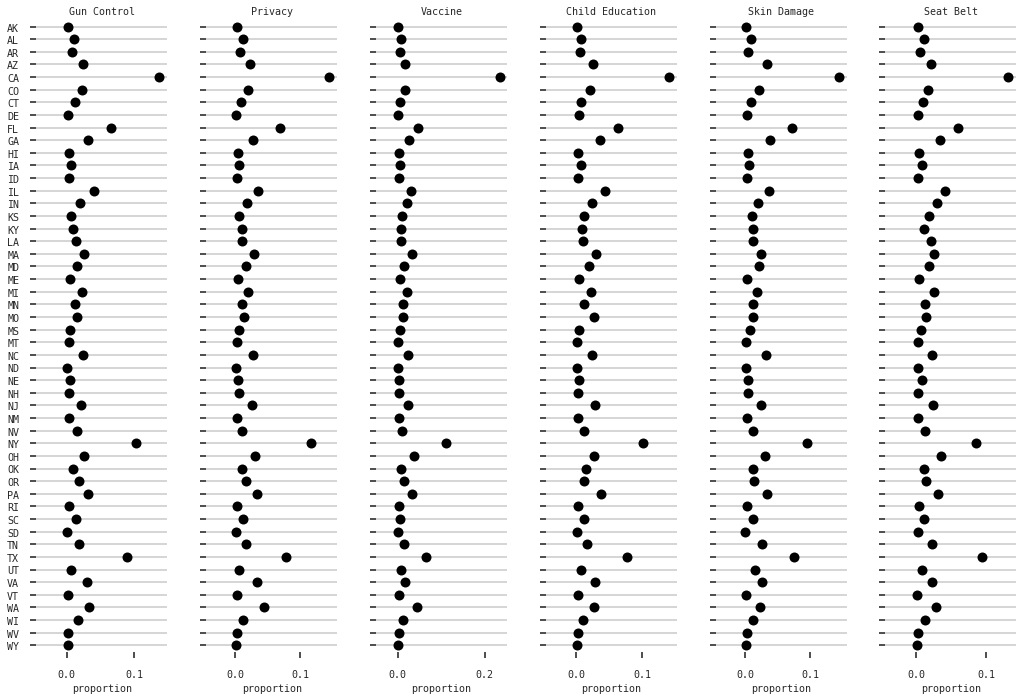

In [29]:
df_t = df[(~df.u_state.isin(NON_STATES)) & (~df.u_state.isnull())].pivot_table(
    index="u_state", columns="topic_name", values="t_id", aggfunc=len)
with sns.plotting_context(
    rc={"axes.titlesize": 10,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
       }), sns.axes_style(
    rc={"font.family": "monospace"}):
    g = sns.PairGrid(df_t.divide(df_t.sum(axis=0), axis=1).reset_index(),
                     x_vars=topic_order, y_vars=["u_state"],
                     size=10, aspect=.25)
    g.map(sns.stripplot, size=10, orient="h",
          color="k", edgecolor="gray")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlabel="proportion", ylabel="",)

    # Use semantically meaningful titles for the columns
    titles = topic_order

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)

# Draw a dot plot using the stripplot function

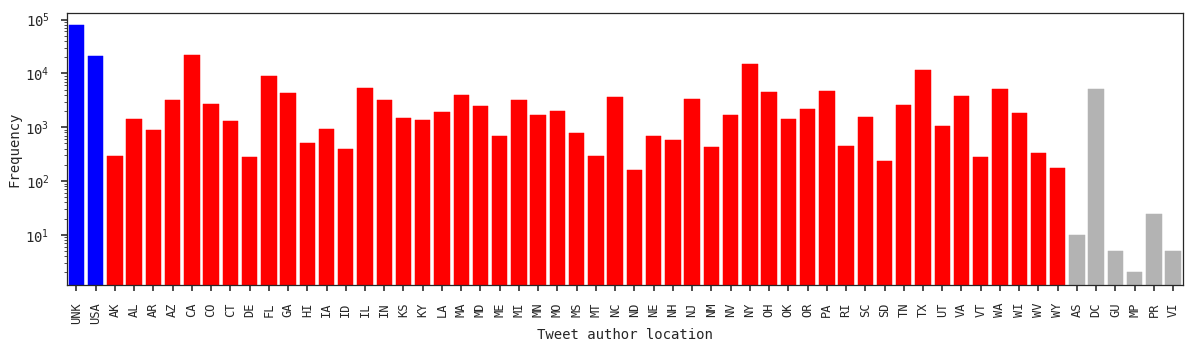

In [30]:
LOCATION_ORDER = (["UNK", "USA"] + sorted(set(
            df.u_state.fillna("UNK").value_counts().index
    ) - NON_STATES)+ sorted(["AS", "DC", "GU",
              "MP", "PR", "VI"]))
colors = ["b"] * 2 + ["r"]*50 +["0.7"]*6
with sns.plotting_context(
    rc={"axes.titlesize": 14,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 14,
       }), sns.axes_style(
    rc={"font.family": "monospace"}):
    fig, ax = plt.subplots(1,1, figsize=(20,5))
    ax = sns.countplot(df.u_state.fillna("UNK"), color='k', ax=ax, 
                      order=LOCATION_ORDER)
    ax.set_yscale('log')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Tweet author location')
    plt.xticks(rotation='vertical')
    #sns.despine(offset=2)
    [ax.patches[i].set_color(c) for i, c in enumerate(colors)]

In [31]:
pd.concat([pd.DataFrame(k.reset_index().values, columns=["Location", "Counts"])
    for k in np.array_split(df.u_state.fillna("UNK").value_counts(), 4, axis=0)], axis=1)

,Location,Counts,Location,Counts,Location,Counts,Location,Counts
0,UNK,77831,NJ,3402,AL,1449,ID,399
1,CA,22123,AZ,3242,OK,1443,WV,325
2,USA,21114,IN,3222,KY,1368,AK,291
3,NY,14689,MI,3141,CT,1284,MT,289
4,TX,11666,CO,2669,UT,1059,VT,278
5,FL,8913,TN,2622,IA,934,DE,274
6,IL,5331,MD,2431,AR,869,SD,237
7,DC,5150,OR,2171,MS,786,WY,173
8,WA,5093,MO,2002,NE,683,ND,160
9,PA,4653,LA,1951,ME,673,PR,24


In [32]:
df.u_state.describe()

count     169038
unique        57
top           CA
freq       22123
Name: u_state, dtype: object

In [33]:
df.u_state.shape

(246869,)

In [34]:
df.groupby("u_id")["u_state"].first().shape, df.groupby("u_id")["u_state"].first().describe()

((151073,), count     107970
 unique        57
 top           CA
 freq       13251
 Name: u_state, dtype: object)